In [2]:
# Code sourced from "Real World Networks - Null Models Exercise1"
# Importing the required libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
# Code sourced from "Real World Networks - Null Models Exercise1"
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [4]:
# Import the csv file as a graph
G = nx.read_edgelist('./Iliad Data.csv', 
                        comments='#',
                        create_using=nx.Graph(), 
                        delimiter=',', 
                        nodetype=str,
                        data=[('weight', float), ('label', str)],
                        encoding='utf-8')

In [17]:
# Code partially sourced from "Real World Networks - Null Models Exercise1"

# 
GN = len(G.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

# Get the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(largest_cc).copy()

# Compute the average shortest path length
C = np.mean(list(nx.clustering(G_sub).values()))
d = nx.average_shortest_path_length(G_sub)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

Average Clustering Coefficient:  0.24050740728149514
Average Shortest Path:  3.4403328325436267


In [19]:
# Generate 1000 erdos-renyi graphs
ER_list = [nx.erdos_renyi_graph(GN, p, directed=False) for i in range(0, 1000)]

In [21]:
# Store results for all graphs
clustering_values = []
path_length_values = []

for ERG in ER_list:
    # Compute clustering coefficient
    clustering_coeff = np.mean(list(nx.clustering(ERG).values()))
    clustering_values.append(clustering_coeff)

    # Check if the graph is connected
    if nx.is_connected(ERG):
        avg_path_length = nx.average_shortest_path_length(ERG)
    else:
        # Work with the largest connected component
        largest_cc = max(nx.connected_components(ERG), key=len)
        G_sub = ERG.subgraph(largest_cc).copy()
        avg_path_length = nx.average_shortest_path_length(G_sub)

    path_length_values.append(avg_path_length)

# Compute the overall mean and standard deviation
overall_avg_clustering = np.mean(clustering_values)
overall_std_clustering = np.std(clustering_values)

overall_avg_path_length = np.mean(path_length_values)
overall_std_path_length = np.std(path_length_values)

# Print results
print(f"Overall Clustering Coefficient - Mean: {overall_avg_clustering}, Std: {overall_std_clustering}")
print(f"Overall Avg Shortest Path Length - Mean: {overall_avg_path_length}, Std: {overall_std_path_length}")

Overall Clustering Coefficient - Mean: 0.007848669399139646, Std: 0.0025505712064725797
Overall Avg Shortest Path Length - Mean: 4.390150168887311, Std: 0.08100060628661321


In [29]:
# Code sourced from "Real World Networks - Null Models Exercise1"

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

<Figure size 600x400 with 0 Axes>

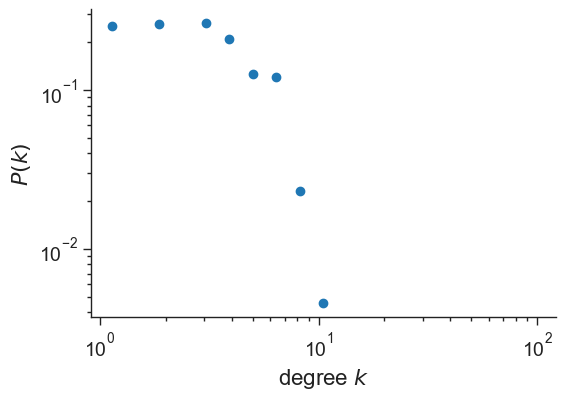

In [28]:
# Store all degree distributions
all_degrees = []

# Compute degree distribution for each graph
for ERG in ER_list:
    degrees = [ERG.degree(n) for n in ERG.nodes()]
    all_degrees.extend(degrees)

# Plot the aggregated degree distribution
plt.figure(figsize=(6, 4))

# Compute the density for the combined degree values
kmin, kmax = min(all_degrees), max(all_degrees)
if kmin == 0: kmin = 1
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)


# Create a new graph from all degrees combined (just for plotting)
G_combined = nx.erdos_renyi_graph(GN, p)  # Placeholder graph
for i, degree in enumerate(all_degrees):
    G_combined.add_node(i, degree=degree)  # Add nodes with degrees

# Plot the degree distribution using your function
plot_degree_dist(G_combined)

# Show the plot
plt.show()

In [30]:
# Code sourced from "Real World Networks - Null Models Exercise1"
clustering_DP = []
short_path_DP = []

for i in range(1000):
    DP = G.copy() # the function edits the graph in place
    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP)
    else:
        # Work with the largest connected component
        largest_cc = max(nx.connected_components(DP), key=len)
        G_sub = DP.subgraph(largest_cc).copy()
        d_DP = nx.average_shortest_path_length(G_sub)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

0.13201217893429124
0.009339031858892916
3.2803873640038943
0.032010259999236935


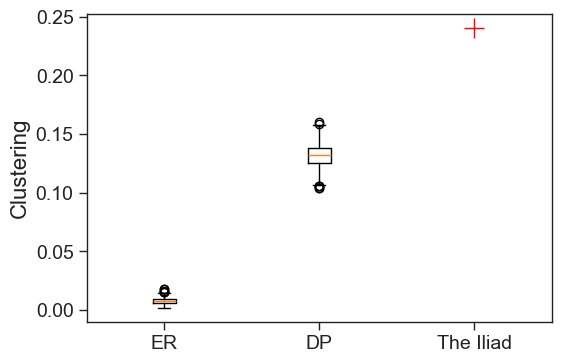

In [31]:
# Code sourced from "Real World Networks - Null Models Exercise1"
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_values,clustering_DP], positions=[1,2])
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','The Iliad'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

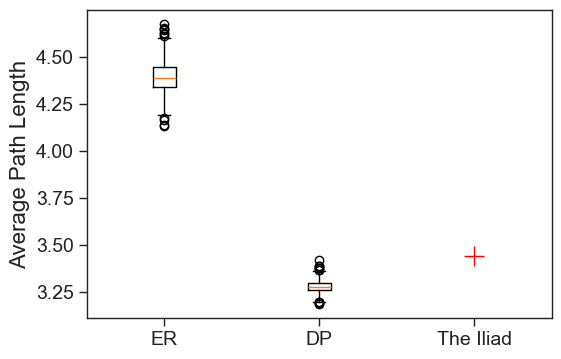

In [32]:
# Code sourced from "Real World Networks - Null Models Exercise1"
fig = plt.figure(figsize=(6,4))

plt.boxplot([path_length_values,short_path_DP], positions=[1,2])
plt.plot(3,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','The Iliad'])
plt.ylabel('Average Path Length')
plt.xlim([0.5,3.5])
plt.show()